# COVID-19 analysis in Indian States

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('fivethirtyeight')

In [2]:
state_covid_df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')
pd.set_option('display.max_rows', 10)

In [3]:
state_covid_df

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN
...,...,...,...,...,...,...,...
16638,2021-06-17,Tripura,60869,55056,631,23,1160421.0
16639,2021-06-17,India,29716486,28506433,382173,11695,385238220.0
16640,2021-06-17,Uttar Pradesh,1703458,1674999,21963,0,54145947.0
16641,2021-06-17,Uttarakhand,338066,321807,7011,5777,5192496.0


In [4]:
state_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16643 entries, 0 to 16642
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16643 non-null  object 
 1   State      16643 non-null  object 
 2   Confirmed  16643 non-null  int64  
 3   Recovered  16643 non-null  int64  
 4   Deceased   16643 non-null  int64  
 5   Other      16643 non-null  int64  
 6   Tested     15889 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 910.3+ KB


In [5]:
state_covid_df.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [6]:
state_covid_df['Date'] = pd.to_datetime(state_covid_df['Date'])

In [7]:
state_covid_df.sort_values(by=['State','Date'], inplace=True)

In [8]:
filt = state_covid_df.State=='Maharashtra'
state_covid_df.loc[filt].tail(200)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
9310,2020-11-30,Maharashtra,1823896,1685122,47151,1066,10856384.0
9346,2020-12-01,Maharashtra,1828826,1691412,47246,1070,10915683.0
9382,2020-12-02,Maharashtra,1832176,1695208,47357,1074,10989496.0
9418,2020-12-03,Maharashtra,1837358,1703274,47472,1077,11059305.0
9454,2020-12-04,Maharashtra,1842587,1710050,47599,1079,11132231.0
...,...,...,...,...,...,...,...
16477,2021-06-13,Maharashtra,5908992,5639271,111104,3029,38046590.0
16514,2021-06-14,Maharashtra,5917121,5654003,112696,3068,38215492.0
16551,2021-06-15,Maharashtra,5924773,5669179,114154,3079,38418130.0
16588,2021-06-16,Maharashtra,5934880,5679746,115390,3083,38641639.0


In [9]:
state_grp = state_covid_df.groupby('State')

In [10]:
state_wise = state_grp.agg({'Confirmed':'max', 'Recovered':'max','Deceased':'max','Tested':'max'}).sort_values(by='Confirmed',ascending=False)

In [11]:
state_wise

,Confirmed,Recovered,Deceased,Tested
State,,,,
India,29716486,28506433,382173,385238220.0
Maharashtra,5934880,5679746,115390,38641639.0
Karnataka,2784355,2599472,33296,32092313.0
Kerala,2761475,2639593,11656,21506139.0
Tamil Nadu,2388746,2244073,30338,30480340.0
...,...,...,...,...
Mizoram,16135,12580,75,439923.0
Dadra and Nagar Haveli and Daman and Diu,10481,10376,4,72410.0
Lakshadweep,9339,8812,45,162152.0


In [12]:
state_wise.drop('State Unassigned', inplace=True)

In [13]:
fatality_ratio = (state_wise['Deceased']/state_wise['Confirmed'])*100

In [14]:
state_wise['Fatality_ratio'] = fatality_ratio

In [15]:
state_wise

,Confirmed,Recovered,Deceased,Tested,Fatality_ratio
State,,,,,
India,29716486,28506433,382173,385238220.0,1.286064
Maharashtra,5934880,5679746,115390,38641639.0,1.944268
Karnataka,2784355,2599472,33296,32092313.0,1.195825
Kerala,2761475,2639593,11656,21506139.0,0.422093
Tamil Nadu,2388746,2244073,30338,30480340.0,1.270039
...,...,...,...,...,...
Sikkim,18896,15452,287,151119.0,1.518840
Mizoram,16135,12580,75,439923.0,0.464828
Dadra and Nagar Haveli and Daman and Diu,10481,10376,4,72410.0,0.038164


## Death to case ratio

In [16]:
only_state_wise_df = state_wise.drop('India')

Text(0.5, 0.98, 'Top 20 States with highest fatality Ratio')

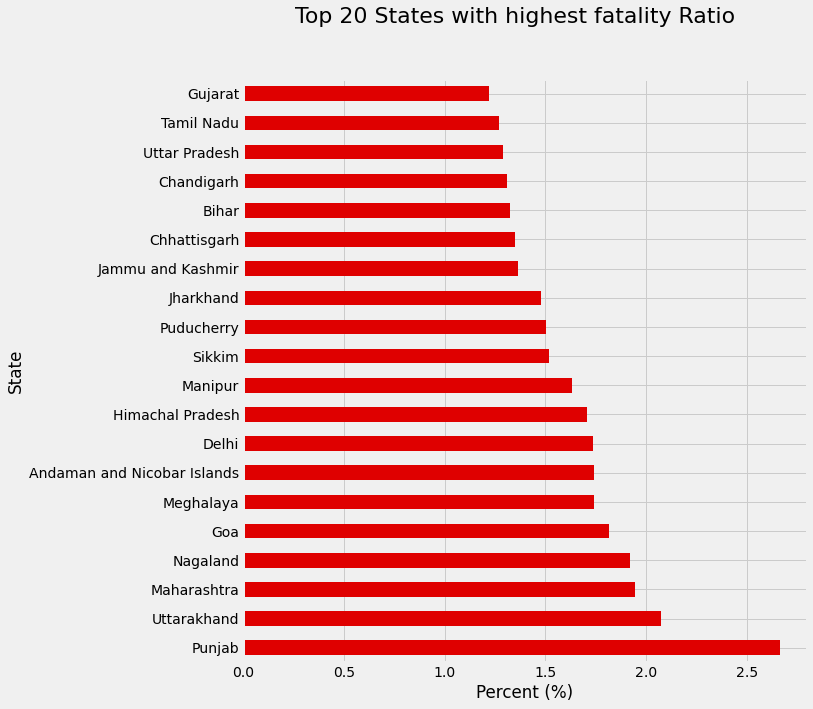

In [17]:
only_state_wise_df.sort_values('Fatality_ratio',
                                     ascending=False)['Fatality_ratio'].head(20).plot.barh(figsize=(9,10), color='#df0000')
plt.xlabel('Percent (%)')
plt.suptitle('Top 20 States with highest fatality Ratio',fontsize=22)
# plt.suptitle('df')

`Percentage of Deceased people is highest in Punjab followed by Sikkim, West Bengal and Maharashtra`

## Recovery rate

In [18]:
states_recovery_per = (only_state_wise_df['Recovered']/only_state_wise_df['Confirmed'])*100

In [19]:
states_recovery_per.sort_values(ascending=False)

State
Dadra and Nagar Haveli and Daman and Diu    98.998187
Rajasthan                                   98.618057
Madhya Pradesh                              98.488608
Haryana                                     98.344913
Uttar Pradesh                               98.329339
                                              ...    
Meghalaya                                   87.718376
Nagaland                                    85.374984
Manipur                                     83.692278
Sikkim                                      81.773920
Mizoram                                     77.967152
Length: 36, dtype: float64

Text(0.5, 1.0, 'Recovery rate of Each State')

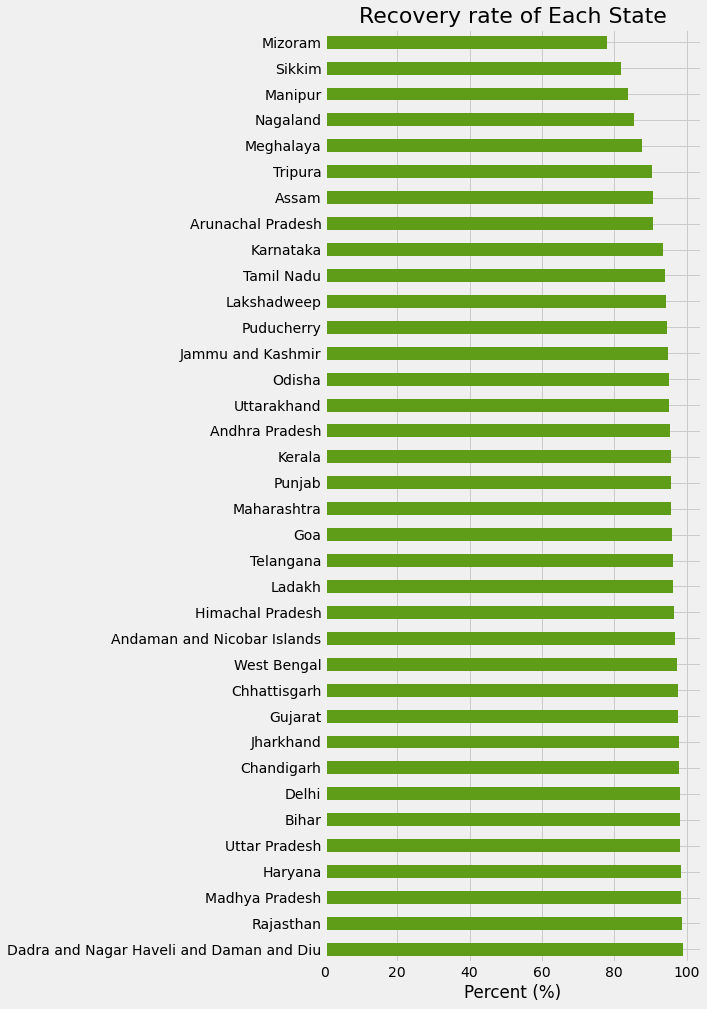

In [20]:
states_recovery_per.sort_values(ascending=False).plot.barh(figsize=(6,16), color='#5f9c17')
plt.xlabel('Percent (%)')
plt.ylabel('')
plt.title('Recovery rate of Each State', fontsize=22)

## Percentage chances of getting COVID

In [21]:
per_chan = (only_state_wise_df['Confirmed']/only_state_wise_df['Tested'])*100

Text(0.5, 0.98, 'Confirmed to Tested Ratio')

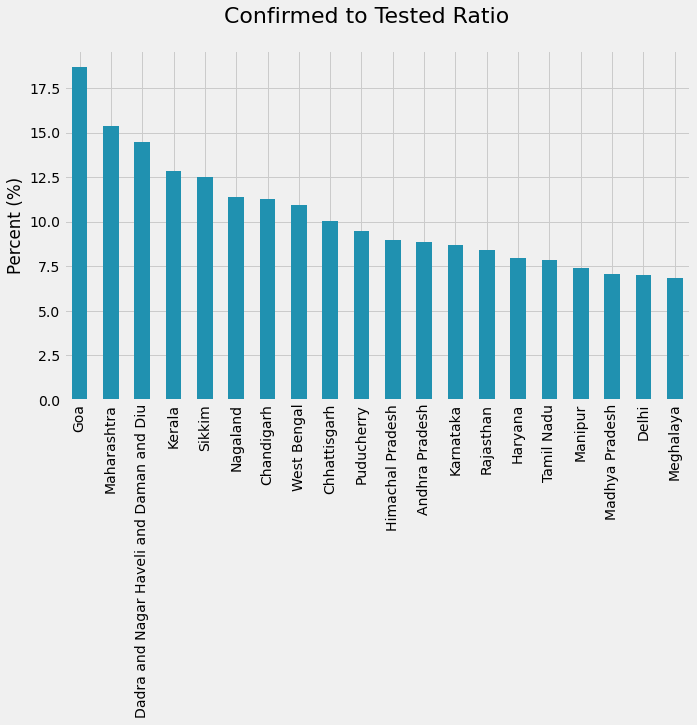

In [22]:
per_chan.sort_values(ascending=False).head(20).plot.bar(figsize=(10,6), color='#2091b0')
plt.ylabel('Percent (%)')
plt.xlabel('')
plt.suptitle('Confirmed to Tested Ratio', fontsize=22)

In [23]:
state_wise.drop('India', inplace=True)

In [24]:
others_ser = state_wise.loc['Uttarakhand':].agg('sum')

In [25]:
state_wise.index

Index(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Andhra Pradesh',
       'Uttar Pradesh', 'West Bengal', 'Delhi', 'Chhattisgarh', 'Rajasthan',
       'Odisha', 'Gujarat', 'Madhya Pradesh', 'Haryana', 'Bihar', 'Telangana',
       'Punjab', 'Assam', 'Jharkhand', 'Uttarakhand', 'Jammu and Kashmir',
       'Himachal Pradesh', 'Goa', 'Puducherry', 'Manipur', 'Chandigarh',
       'Tripura', 'Meghalaya', 'Arunachal Pradesh', 'Nagaland', 'Ladakh',
       'Sikkim', 'Mizoram', 'Dadra and Nagar Haveli and Daman and Diu',
       'Lakshadweep', 'Andaman and Nicobar Islands'],
      dtype='object', name='State')

In [26]:
state_wise.drop(index=['Uttarakhand', 'Goa', 'Himachal Pradesh', 'Puducherry', 'Tripura',
       'Manipur', 'Chandigarh', 'Arunachal Pradesh', 'Meghalaya', 'Nagaland',
       'Ladakh', 'Sikkim', 'Andaman and Nicobar Islands', 'Mizoram',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Lakshadweep'], inplace=True)

In [27]:
state_wise.loc['Others'] = others_ser

In [28]:
state_wise

,Confirmed,Recovered,Deceased,Tested,Fatality_ratio
State,,,,,
Maharashtra,5934880.0,5679746.0,115390.0,38641639.0,1.944268
Karnataka,2784355.0,2599472.0,33296.0,32092313.0,1.195825
Kerala,2761475.0,2639593.0,11656.0,21506139.0,0.422093
Tamil Nadu,2388746.0,2244073.0,30338.0,30480340.0,1.270039
Andhra Pradesh,1832902.0,1750904.0,12167.0,20736435.0,0.663811
...,...,...,...,...,...
Punjab,589828.0,564084.0,15698.0,10188326.0,2.661454
Assam,469976.0,426259.0,4064.0,13020975.0,0.864725
Jharkhand,343983.0,336645.0,5092.0,9216159.0,1.480306


In [29]:
state_wise_cases = state_wise['Confirmed']
state_wise_rec = state_wise['Recovered']
state_wise_deaths = state_wise['Deceased']

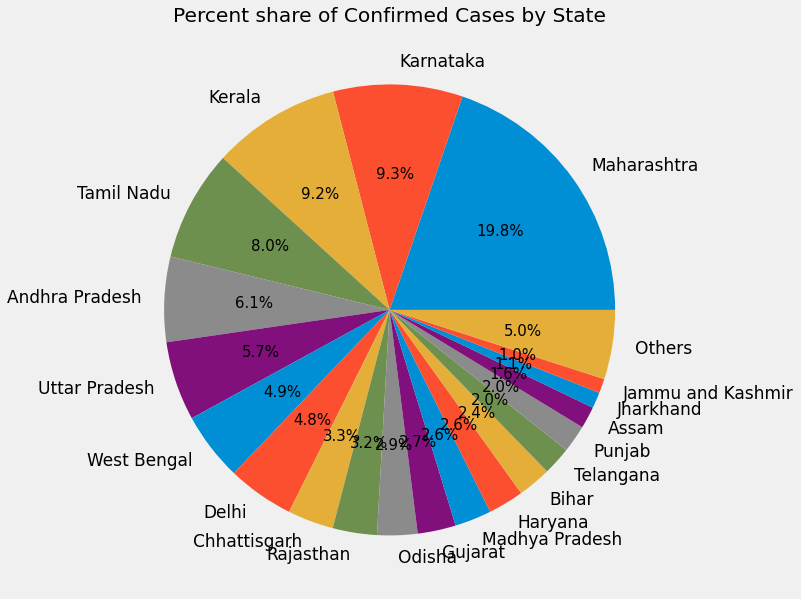

In [30]:
fig, ax = plt.subplots()
fig.set_figheight(27)
fig.set_figwidth(9)
patches, texts, autotexts = ax.pie(state_wise_cases.values, labels=state_wise_cases.index, autopct='%1.1f%%')

for i in range(len(texts)):
    texts[i].set_fontsize(17)
    autotexts[i].set_fontsize(15)

plt.title('Percent share of Confirmed Cases by State')

plt.savefig('Images/cases.png', bbox_inches='tight', pad_inches=0.4)

Above graph shows what percentage of Confirmed COVID cases are comming from each State out of the total cases in India

In [31]:
maharashtra = state_grp.get_group('Maharashtra')[['Date','Confirmed','Recovered','Deceased']]
karnataka = state_grp.get_group('Karnataka')[['Date','Confirmed','Recovered','Deceased']]
andhra = state_grp.get_group('Andhra Pradesh')[['Date','Confirmed','Recovered','Deceased']]
tamil_nadu = state_grp.get_group('Tamil Nadu')[['Date','Confirmed','Recovered','Deceased']]
kerala = state_grp.get_group('Kerala')[['Date','Confirmed','Recovered','Deceased']]
delhi = state_grp.get_group('Delhi')[['Date','Confirmed','Recovered','Deceased']]
up = state_grp.get_group('Uttar Pradesh')[['Date','Confirmed','Recovered','Deceased']]
west_ben = state_grp.get_group('West Bengal')[['Date','Confirmed','Recovered','Deceased']]

In [32]:
maharashtra

,Date,Confirmed,Recovered,Deceased
62,2020-03-09,2,0,0
75,2020-03-10,5,0,0
88,2020-03-11,11,0,0
102,2020-03-12,14,0,0
116,2020-03-13,17,0,0
...,...,...,...,...
16477,2021-06-13,5908992,5639271,111104
16514,2021-06-14,5917121,5654003,112696
16551,2021-06-15,5924773,5669179,114154
16588,2021-06-16,5934880,5679746,115390


Text(0.5, 0.98, 'Top 8 States with Higest cases over Time')

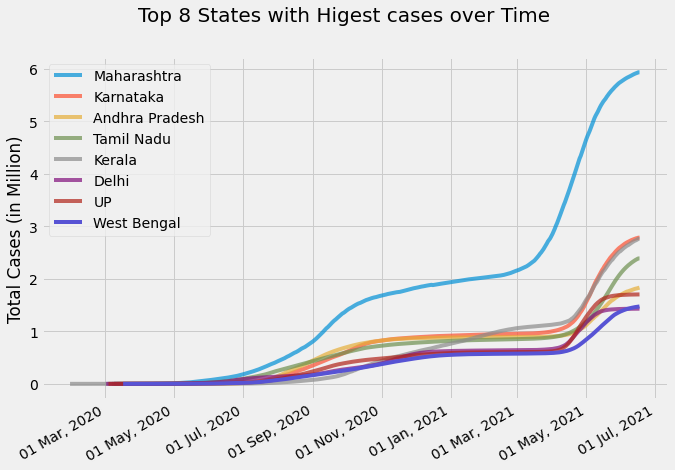

In [33]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Confirmed']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Confirmed']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Confirmed']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Confirmed']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Confirmed']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Confirmed']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Confirmed']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Confirmed']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Top 8 States with Higest cases over Time', fontsize=20)

Text(0.5, 0.98, 'Top 8 States Recovery over Time')

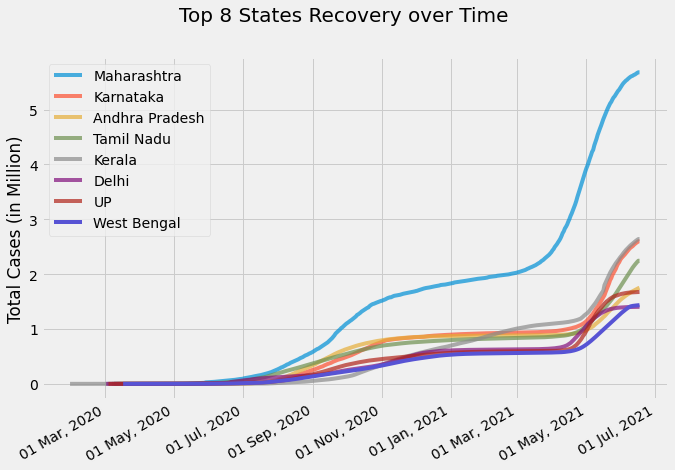

In [34]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Recovered']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Recovered']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Recovered']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Recovered']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Recovered']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Recovered']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Recovered']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Recovered']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Top 8 States Recovery over Time', fontsize=20)

Text(0.5, 0.98, 'Total Deaths in Top 8 States over Time')

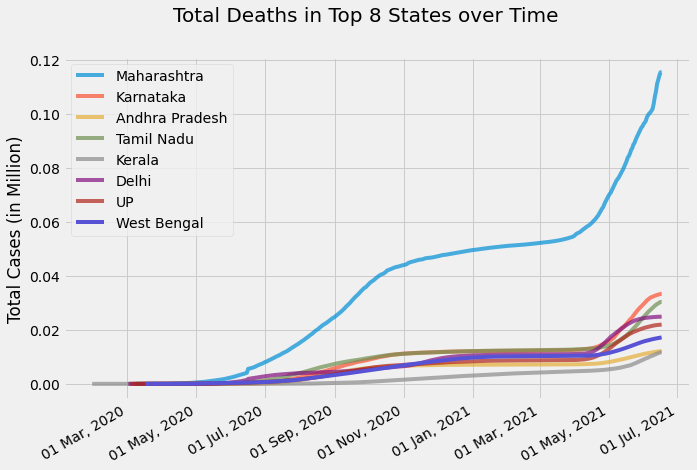

In [35]:
plt.figure(figsize=(10,7))
dates = maharashtra['Date']
plt.plot(dates, maharashtra['Deceased']/10**6,label='Maharashtra',alpha=.7)
dates = karnataka['Date']
plt.plot(dates, karnataka['Deceased']/10**6,label='Karnataka',alpha=.7)
dates = andhra['Date']
plt.plot(dates, andhra['Deceased']/10**6,label='Andhra Pradesh',alpha=.7)
dates = tamil_nadu['Date']
plt.plot(dates, tamil_nadu['Deceased']/10**6,label='Tamil Nadu',alpha=.7)
dates = kerala['Date']
plt.plot(dates, kerala['Deceased']/10**6,label='Kerala',alpha=.7)
dates = delhi['Date']
plt.plot(dates, delhi['Deceased']/10**6,label='Delhi',alpha=.7)
dates = up['Date']
plt.plot(dates, up['Deceased']/10**6,label='UP',color='#b02319',alpha=.7)
dates = west_ben['Date']
plt.plot(dates, west_ben['Deceased']/10**6,label='West Bengal',color='#5753d4')

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Total Cases (in Million)')
plt.suptitle('Total Deaths in Top 8 States over Time', fontsize=20)

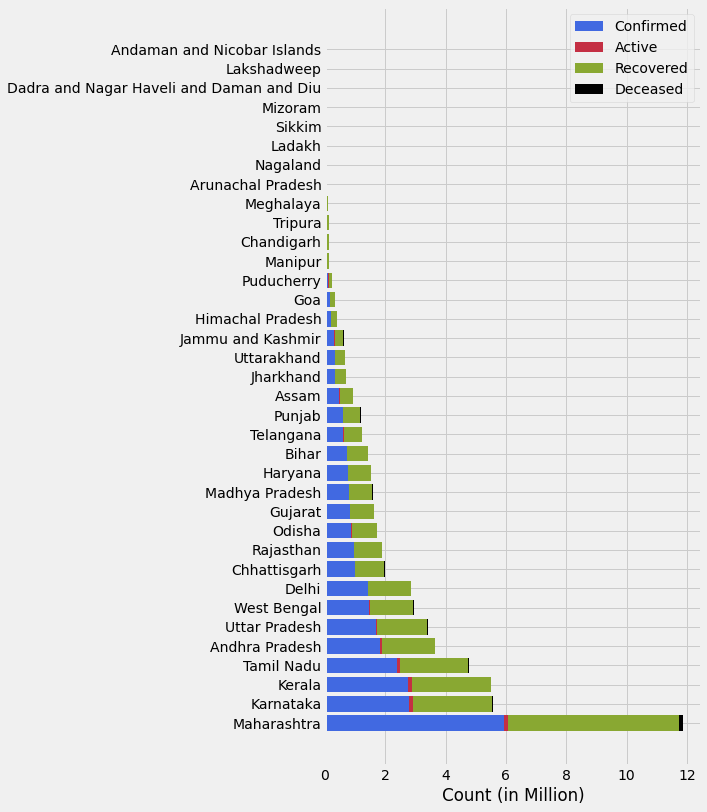

In [36]:
death = only_state_wise_df.Deceased
recov = only_state_wise_df.Recovered
conf = only_state_wise_df.Confirmed
active = conf - death - recov

plt.figure(figsize=(6,13))

data_lst = [conf/10**6, active/10**6, recov/10**6, death/10**6]
label_lst = ['Confirmed','Active','Recovered','Deceased']
color_lst = ['royalblue','#c42f43','#89a832','black']
left=0

for data, color, label in zip(data_lst, color_lst, label_lst):
    plt.barh(data.index, data, color=color, left=left, label=label)
    left+=data

plt.legend()
plt.xlabel('Count (in Million)')

plt.savefig('Images/cases_summary.png', bbox_inches='tight', pad_inches=.3)

## Confirmed = Active + Recovered + Deceased

In [37]:
state_daily_df = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise_daily.csv')

In [38]:
state_daily_df.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [39]:
state_daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1380 non-null   object
 1   Date_YMD  1380 non-null   object
 2   Status    1380 non-null   object
 3   TT        1380 non-null   int64 
 4   AN        1380 non-null   int64 
 5   AP        1380 non-null   int64 
 6   AR        1380 non-null   int64 
 7   AS        1380 non-null   int64 
 8   BR        1380 non-null   int64 
 9   CH        1380 non-null   int64 
 10  CT        1380 non-null   int64 
 11  DN        1380 non-null   int64 
 12  DD        1380 non-null   int64 
 13  DL        1380 non-null   int64 
 14  GA        1380 non-null   int64 
 15  GJ        1380 non-null   int64 
 16  HR        1380 non-null   int64 
 17  HP        1380 non-null   int64 
 18  JK        1380 non-null   int64 
 19  JH        1380 non-null   int64 
 20  KA        1380 non-null   int64 
 21  KL        1380

In [40]:
state_daily_df['Date_YMD'] = pd.to_datetime(state_daily_df['Date_YMD'], format='%Y-%m-%d')

In [41]:
state_daily_df.sort_values(by=['Status','Date_YMD'], inplace=True)

In [42]:
state_daily_df

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,...,1,3,0,1,8,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,12-Jun-21,2021-06-12,Recovered,132664,12,11577,380,5600,1062,79,...,2135,975,292,27463,2384,565,1757,695,3149,0
1369,13-Jun-21,2021-06-13,Recovered,119574,29,12492,434,5403,868,71,...,1980,1260,387,25895,2261,703,1221,629,2497,0
1372,14-Jun-21,2021-06-14,Recovered,117376,9,10114,356,4299,851,61,...,1650,1231,281,25561,2175,610,1116,990,2171,0
1375,15-Jun-21,2021-06-15,Recovered,107767,15,10567,326,2906,813,58,...,1691,1006,272,23207,2070,743,1104,515,2068,0


In [43]:
state_daily_df.set_index('Date_YMD', inplace=True)

In [44]:
filt = state_daily_df.Status=='Confirmed'
maha_daily_conf = state_daily_df.loc[filt, 'MH']
filt = state_daily_df.Status=='Recovered'
maha_daily_rec = state_daily_df.loc[filt, 'MH']
filt = state_daily_df.Status=='Deceased'
maha_daily_death = state_daily_df.loc[filt, 'MH']

In [45]:
curr_date = state_daily_df.index.max()

todays_cases = maha_daily_conf.get(curr_date)
todays_rec = maha_daily_rec.get(curr_date)
todays_death = maha_daily_death.get(curr_date)

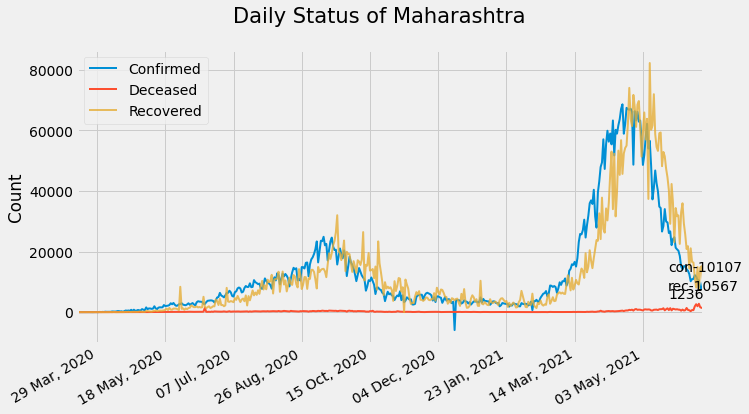

In [46]:
plt.figure(figsize=(10,6))

maha_daily_conf.plot(linewidth=2, label='Confirmed')
maha_daily_death.plot(linewidth=2, label='Deceased')
maha_daily_rec.plot(linewidth=2, label='Recovered', alpha=.8)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))


plt.ylabel('Count')
plt.xlabel('')
plt.suptitle('Daily Status of Maharashtra', fontsize=21)
plt.legend()

plt.annotate(text='con-'+str(todays_cases), xy=(curr_date, todays_cases),
             xycoords='data', xytext=(-35,10), textcoords='offset points', fontsize=14)
plt.annotate(text='rec-'+str(todays_rec), xy=(curr_date, todays_rec),
             xycoords='data', xytext=(-35,-10), textcoords='offset points', fontsize=14)
plt.annotate(text=str(todays_death), xy=(curr_date, todays_death),
             xycoords='data', xytext=(-35,10), textcoords='offset points', fontsize=14)

plt.savefig('Images/maha_summary.png',bbox_inches='tight', pad_inches=0.2)

# Vaccination

In [47]:
vac_df = pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv')
pd.set_option('display.max_rows', 10)

In [48]:
vac_df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,14/06/2021,West Bengal,13798076.0,894838.0,2027.0,13798076.0,4069368.0,7758272.0,6037791.0,2013.0,2193516.0,15672624.0,1304.0,1267.0,3825970.0,5535198.0,4429118.0,17867444.0
5694,15/06/2021,West Bengal,14013951.0,920508.0,2316.0,14013951.0,4109767.0,7880231.0,6131668.0,2052.0,2238508.0,15883827.0,1383.0,1268.0,3902985.0,5632691.0,4470082.0,18123718.0
5695,16/06/2021,West Bengal,14127403.0,689858.0,1399.0,14127403.0,4121647.0,7946848.0,6178486.0,2069.0,2261779.0,15985720.0,1551.0,1268.0,3961701.0,5671448.0,4485809.0,18249050.0
5696,17/06/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
filt = vac_df.State=='India'
index_names = vac_df.loc[filt].index
state_vac_df = vac_df.drop(index_names).copy()

In [50]:
state_vac_df

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
154,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
155,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
156,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
157,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
158,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,14/06/2021,West Bengal,13798076.0,894838.0,2027.0,13798076.0,4069368.0,7758272.0,6037791.0,2013.0,2193516.0,15672624.0,1304.0,1267.0,3825970.0,5535198.0,4429118.0,17867444.0
5694,15/06/2021,West Bengal,14013951.0,920508.0,2316.0,14013951.0,4109767.0,7880231.0,6131668.0,2052.0,2238508.0,15883827.0,1383.0,1268.0,3902985.0,5632691.0,4470082.0,18123718.0
5695,16/06/2021,West Bengal,14127403.0,689858.0,1399.0,14127403.0,4121647.0,7946848.0,6178486.0,2069.0,2261779.0,15985720.0,1551.0,1268.0,3961701.0,5671448.0,4485809.0,18249050.0
5696,17/06/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
state_vac_df.drop(['Total Sessions Conducted','Total Sites ','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)'], axis=1, inplace=True)

In [52]:
state_vac_df.head(200)

,Updated On,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
154,16/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
155,17/01/2021,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
156,18/01/2021,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
157,19/01/2021,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
158,20/01/2021,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,26/02/2021,Andhra Pradesh,535955.0,535955.0,137812.0,65196.0,470759.0,NaN,NaN,NaN,NaN,NaN,673767.0
350,27/02/2021,Andhra Pradesh,535955.0,535955.0,137812.0,65196.0,470759.0,NaN,NaN,NaN,NaN,NaN,673767.0
351,28/02/2021,Andhra Pradesh,535955.0,535955.0,137812.0,65196.0,470759.0,NaN,NaN,NaN,NaN,NaN,673767.0
352,01/03/2021,Andhra Pradesh,535955.0,535955.0,137812.0,65196.0,470759.0,NaN,NaN,NaN,NaN,NaN,673767.0


In [53]:
state_vac_df.rename(columns={'Updated On':'Date'}, inplace=True)

In [54]:
state_vac_df['Date'] = pd.to_datetime(state_vac_df['Date'], format='%d/%m/%Y')
state_vac_df.sort_values(by=['State', 'Date'])

,Date,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
154,2021-01-16,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
155,2021-01-17,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
156,2021-01-18,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
157,2021-01-19,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
158,2021-01-20,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5693,2021-06-14,West Bengal,13798076.0,13798076.0,4069368.0,2193516.0,15672624.0,1304.0,1267.0,3825970.0,5535198.0,4429118.0,17867444.0
5694,2021-06-15,West Bengal,14013951.0,14013951.0,4109767.0,2238508.0,15883827.0,1383.0,1268.0,3902985.0,5632691.0,4470082.0,18123718.0
5695,2021-06-16,West Bengal,14127403.0,14127403.0,4121647.0,2261779.0,15985720.0,1551.0,1268.0,3961701.0,5671448.0,4485809.0,18249050.0
5696,2021-06-17,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
state_vac_grp = state_vac_df.groupby('State')

In [56]:
state_wise_vac = state_vac_grp.agg({'First Dose Administered':'max', 'Second Dose Administered':'max',
                  'Second Dose Administered':'max', 'Total Covaxin Administered':'max',
                  'Total CoviShield Administered':'max','Total Individuals Vaccinated':'max',
                  'Total Doses Administered':'max'})

In [57]:
states = (state_wise_vac['Total Individuals Vaccinated']/10**6).sort_values(ascending=False)

Text(0.5, 1.0, 'Vaccination of all States')

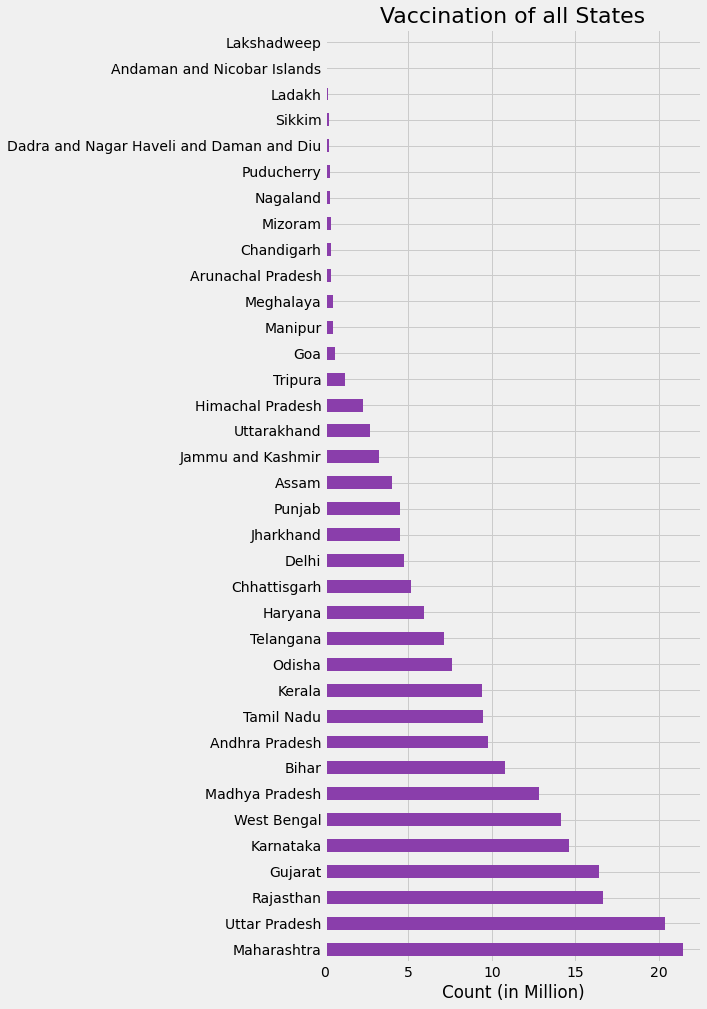

In [58]:
plt.figure(figsize=(6,16))
states.plot.barh(color='#8a3eab')
plt.xlabel('Count (in Million)')
plt.ylabel('')
plt.title('Vaccination of all States', fontsize=22)

In [59]:
state_vac_df.head(300)

,Date,State,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
154,2021-01-16,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
155,2021-01-17,Andaman and Nicobar Islands,23.0,23.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,23.0
156,2021-01-18,Andaman and Nicobar Islands,42.0,42.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,42.0
157,2021-01-19,Andaman and Nicobar Islands,89.0,89.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,89.0
158,2021-01-20,Andaman and Nicobar Islands,124.0,124.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,2021-06-06,Andhra Pradesh,8293652.0,8293652.0,2576319.0,1962928.0,8905629.0,1414.0,330.0,1226941.0,4314874.0,2750212.0,10869971.0
450,2021-06-07,Andhra Pradesh,8429887.0,8429887.0,2583734.0,2027977.0,8983724.0,1920.0,330.0,1257449.0,4392940.0,2777850.0,11013621.0
451,2021-06-08,Andhra Pradesh,8472406.0,8472406.0,2587589.0,2048032.0,9009451.0,2512.0,330.0,1275494.0,4411286.0,2783959.0,11059995.0
452,2021-06-09,Andhra Pradesh,8637923.0,8637923.0,2596880.0,2056250.0,9175289.0,3264.0,330.0,1329357.0,4493966.0,2812906.0,11234803.0


In [60]:
state_vac_df.dropna(thresh=5, inplace=True)

In [61]:
state_vac_df.set_index(['State', 'Date'], inplace=True)

In [62]:
mah_total_vac = state_vac_df.loc['Maharashtra']['Total Individuals Vaccinated']
up_total_vac = state_vac_df.loc['Uttar Pradesh']['Total Individuals Vaccinated']
guj_total_vac = state_vac_df.loc['Gujarat']['Total Individuals Vaccinated']
raj_total_vac = state_vac_df.loc['Rajasthan']['Total Individuals Vaccinated']
wb_total_vac = state_vac_df.loc['West Bengal']['Total Individuals Vaccinated']
kar_total_vac = state_vac_df.loc['Karnataka']['Total Individuals Vaccinated']


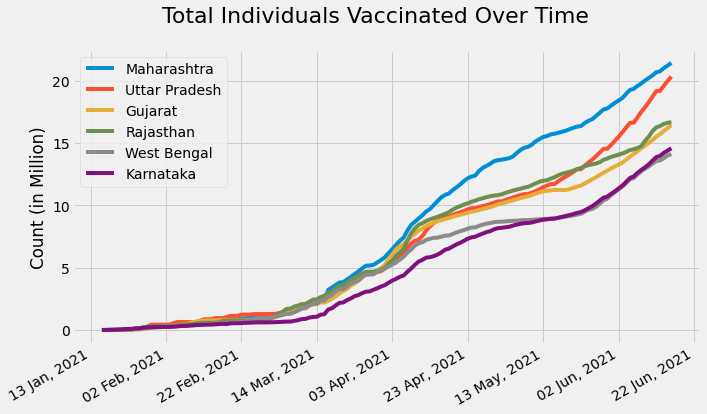

In [63]:
plt.figure(figsize=(10,6))
plt.plot(mah_total_vac/10**6, label='Maharashtra')
plt.plot(up_total_vac/10**6, label='Uttar Pradesh')
plt.plot(guj_total_vac/10**6, label='Gujarat')
plt.plot(raj_total_vac/10**6, label='Rajasthan')
plt.plot(wb_total_vac/10**6, label='West Bengal')
plt.plot(kar_total_vac/10**6, label='Karnataka')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.xlabel('')
plt.ylabel('Count (in Million)')
plt.suptitle('Total Individuals Vaccinated Over Time', fontsize=22)

plt.savefig('Images/vac_time.png', bbox_inches='tight', pad_inches=0.2)

## How many Individuals are immunized daily?

In [64]:
state_vac_df

Total Individuals Vaccinated  \
State                       Date                                       
Andaman and Nicobar Islands 2021-01-16                          23.0   
                            2021-01-17                          23.0   
                            2021-01-18                          42.0   
                            2021-01-19                          89.0   
                            2021-01-20                         124.0   
...                                                              ...   
West Bengal                 2021-06-12                    13561818.0   
                            2021-06-13                    13615740.0   
                            2021-06-14                    13798076.0   
                            2021-06-15                    14013951.0   
                            2021-06-16                    14127403.0   

                                        First Dose Administered  \
State                       Date                                  
Andaman and Nicobar Islands 2021-01-16                     23.0   
                            2021-01-17                     23.0   
                            2021-01-18                     42.0   
                            2021-01-19                     89.0   
                            2021-01-20                    124.0   
...                                                         ...   
West Bengal                 2021-06-12               13561818.0   
                            2021-06-13               13615740.0   
                            2021-06-14               13798076.0   
                            2021-06-15               14013951.0   
                            2021-06-16               14127403.0   

                                        Second Dose Administered  \
State                       Date                                   
Andaman and Nicobar Islands 2021-01-16                       0.0   
                            2021-01-17                       0.0   
                            2021-01-18                       0.0   
                            2021-01-19                       0.0   
                            2021-01-20                       0.0   
...                                                          ...   
West Bengal                 2021-06-12                 4038621.0   
                            2021-06-13                 4041960.0   
                            2021-06-14                 4069368.0   
                            2021-06-15                 4109767.0   
                            2021-06-16                 4121647.0   

                                        Total Covaxin Administered  \
State                       Date                                     
Andaman and Nicobar Islands 2021-01-16                         0.0   
                            2021-01-17                         0.0   
                            2021-01-18                         0.0   
                            2021-01-19                         0.0   
                            2021-01-20                         0.0   
...                                                            ...   
West Bengal                 2021-06-12                   2140344.0   
                            2021-06-13                   2149099.0   
                            2021-06-14                   2193516.0   
                            2021-06-15                   2238508.0   
                            2021-06-16                   2261779.0   

                                        Total CoviShield Administered  \
State                       Date                                        
Andaman and Nicobar Islands 2021-01-16                           23.0   
                            2021-01-17                           23.0   
                            2021-01-18                           42.0   
                            2021-01-19                           89.0 

In [65]:
state_vac_df['Daily Individuals Vaccinated']=""

In [66]:
prev_state=state_vac_df.index[0][0]
prev_vac=0
curr_vac=0
count = 0

for state, date in state_vac_df.index:
    curr_state = state
    
    if(curr_state!=prev_state): 
        prev_vac=0
        
    curr_vac = state_vac_df.loc[(state,date),'Total Individuals Vaccinated']
    if(curr_vac-prev_vac < 0 ): 
        count+=1;
        state_vac_df.loc[(state,date), 'Daily Individuals Vaccinated'] = 0
    else: state_vac_df.loc[(state,date), 'Daily Individuals Vaccinated'] = curr_vac-prev_vac
    prev_vac=curr_vac
    prev_state = curr_state

In [67]:
state_vac_df

Total Individuals Vaccinated  \
State                       Date                                       
Andaman and Nicobar Islands 2021-01-16                          23.0   
                            2021-01-17                          23.0   
                            2021-01-18                          42.0   
                            2021-01-19                          89.0   
                            2021-01-20                         124.0   
...                                                              ...   
West Bengal                 2021-06-12                    13561818.0   
                            2021-06-13                    13615740.0   
                            2021-06-14                    13798076.0   
                            2021-06-15                    14013951.0   
                            2021-06-16                    14127403.0   

                                        First Dose Administered  \
State                       Date                                  
Andaman and Nicobar Islands 2021-01-16                     23.0   
                            2021-01-17                     23.0   
                            2021-01-18                     42.0   
                            2021-01-19                     89.0   
                            2021-01-20                    124.0   
...                                                         ...   
West Bengal                 2021-06-12               13561818.0   
                            2021-06-13               13615740.0   
                            2021-06-14               13798076.0   
                            2021-06-15               14013951.0   
                            2021-06-16               14127403.0   

                                        Second Dose Administered  \
State                       Date                                   
Andaman and Nicobar Islands 2021-01-16                       0.0   
                            2021-01-17                       0.0   
                            2021-01-18                       0.0   
                            2021-01-19                       0.0   
                            2021-01-20                       0.0   
...                                                          ...   
West Bengal                 2021-06-12                 4038621.0   
                            2021-06-13                 4041960.0   
                            2021-06-14                 4069368.0   
                            2021-06-15                 4109767.0   
                            2021-06-16                 4121647.0   

                                        Total Covaxin Administered  \
State                       Date                                     
Andaman and Nicobar Islands 2021-01-16                         0.0   
                            2021-01-17                         0.0   
                            2021-01-18                         0.0   
                            2021-01-19                         0.0   
                            2021-01-20                         0.0   
...                                                            ...   
West Bengal                 2021-06-12                   2140344.0   
                            2021-06-13                   2149099.0   
                            2021-06-14                   2193516.0   
                            2021-06-15                   2238508.0   
                            2021-06-16                   2261779.0   

                                        Total CoviShield Administered  \
State                       Date                                        
Andaman and Nicobar Islands 2021-01-16                           23.0   
                            2021-01-17                           23.0   
                            2021-01-18                           42.0   
                            2021-01-19                           89.0 

In [68]:
mah_daily_vac = state_vac_df.loc['Maharashtra']['Daily Individuals Vaccinated']
up_daily_vac = state_vac_df.loc['Uttar Pradesh']['Daily Individuals Vaccinated']
raj_daily_vac = state_vac_df.loc['Rajasthan']['Daily Individuals Vaccinated']
guj_daily_vac = state_vac_df.loc['Gujarat']['Daily Individuals Vaccinated']
wb_daily_vac = state_vac_df.loc['West Bengal']['Daily Individuals Vaccinated']
kar_daily_vac = state_vac_df.loc['Karnataka']['Daily Individuals Vaccinated']

In [69]:
curr_mah_vac = mah_daily_vac.loc[curr_date]

In [70]:
curr_mah_vac

202456.0

Text(-5, 10, '202456')

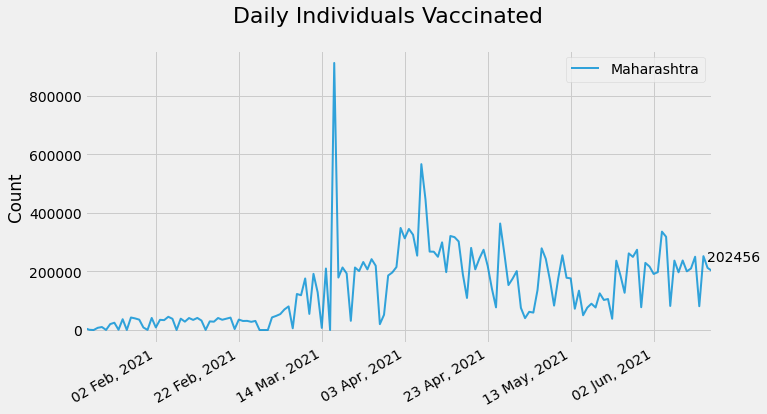

In [71]:
plt.figure(figsize=(10,6))
mah_daily_vac.plot(label='Maharashtra',linewidth=2, alpha=.8)
# up_daily_vac.plot(label='Uttar Pradesh', linewidth=2, alpha=.8)
# raj_daily_vac.plot(label='Rajasthan', linewidth=2, alpha=.8)
# guj_daily_vac.plot(label='Gujarat', linewidth=2, alpha=.7)
# wb_daily_vac.plot(label='West Bengal', linewidth=2, alpha=.7)
# kar_daily_vac.plot(label='Karnataka', linewidth=2, alpha=.6)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))

plt.legend()
plt.xlabel('')
plt.ylabel('Count')
plt.suptitle('Daily Individuals Vaccinated', fontsize=22)
plt.annotate(text=str(int(curr_mah_vac)), xy=(curr_date, curr_mah_vac),
             xycoords='data', xytext=(-5,10), textcoords='offset points', fontsize=14)

## Summary

In [72]:
states_conf = only_state_wise_df['Confirmed']/10**6
states_active = only_state_wise_df['Confirmed']-only_state_wise_df['Recovered']-only_state_wise_df['Deceased']
states_fat_ratio = only_state_wise_df['Fatality_ratio']*1000

Text(0, 0.5, 'Active')

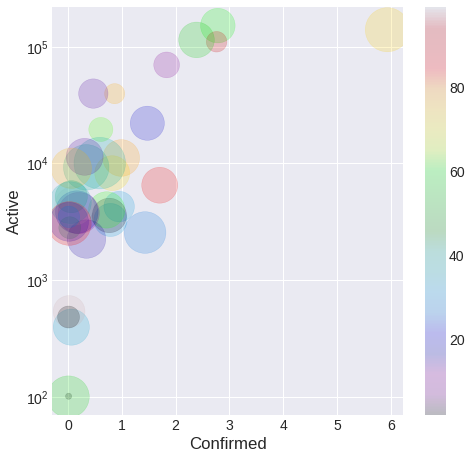

In [73]:
plt.style.use("seaborn-dark")

plt.figure(figsize=(7,7))
colors = np.random.randint(100, size=(len(states_conf)))

plt.scatter(states_conf, states_active, c=colors, alpha=.2, s=states_fat_ratio, cmap='nipy_spectral')
plt.yscale('log')
plt.colorbar()
plt.grid(True)
plt.xlabel('Confirmed')
plt.ylabel('Active')